In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('task_prep.csv', sep=';')
df

,visit_score,product_search_score,ctr_score,stay_score,frequency_score,product_variation_score,order_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,-0.372171,1.755587,3.748009,3,3
1,13.225950,3.600102,0.130985,0.053575,-1.946621,1.371272,3.469659,3,1
2,14.603376,5.084047,-0.004651,-0.036299,-1.097486,1.448015,3.855939,3,1
3,26.149905,3.025501,0.229740,0.204591,1.326652,1.937680,2.362421,3,3
4,19.810630,5.020400,-0.011347,-0.028780,-1.248827,1.522902,3.278624,4,3
...,...,...,...,...,...,...,...,...,...
7155,18.164300,7.240835,-0.056238,-0.177289,-1.088837,1.397004,4.758199,4,1
7156,25.363705,4.881059,0.038720,0.054397,0.897137,2.025810,1.823892,4,3
7157,11.160720,5.019859,0.053864,-0.102337,1.603054,2.150058,2.422193,4,3
7158,17.140020,9.269037,0.059911,-0.004299,-1.028902,1.433648,3.715392,4,3


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)

In [4]:
#from sklearn.cluster import KMeans
#wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
#    kmeans.fit(df)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

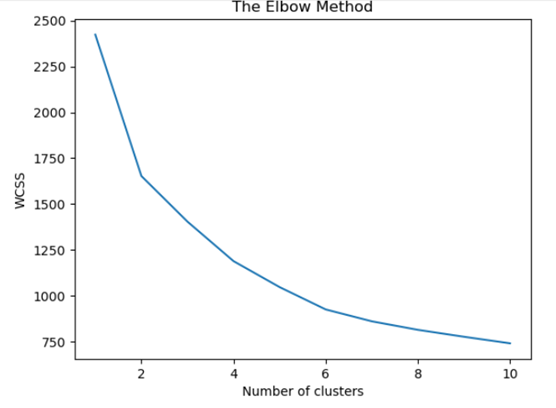

Из-за слышком загруженного кода предупреждениями и прочим доп текстом, возникающим во время выполнения чанки, я закомментрировала сам код, а результаты вывела в виде скрина. Прошу прощение за такой вид кода. 

По результатам видим три явных локтя на уровне значений 2, 4 и 6. Наиболее оптимальным количеством кластеров, исходя из графика, является 4-е кластера, так как после этой итерации плотность элементов снижается с меньшей динамикое, т.е. график становится более пологим. Проверим предположение о к-ве кластеров при помощи метода Силуэтов.

In [5]:
#from sklearn.metrics import silhouette_score
#sil = []
#for k in range(2, 8):
#  kmeans = KMeans(n_clusters = k).fit(df)  
#  preds = kmeans.fit_predict(df)
#  sil.append(silhouette_score(df, preds, metric = 'euclidean'))
#plt.plot(range(2, 8), sil)
#plt.title('Silhouette Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('Sil')
#plt.show()
#for i in range(len(sil)):
#print(str(i+2) +":"+ str(sil[i]))

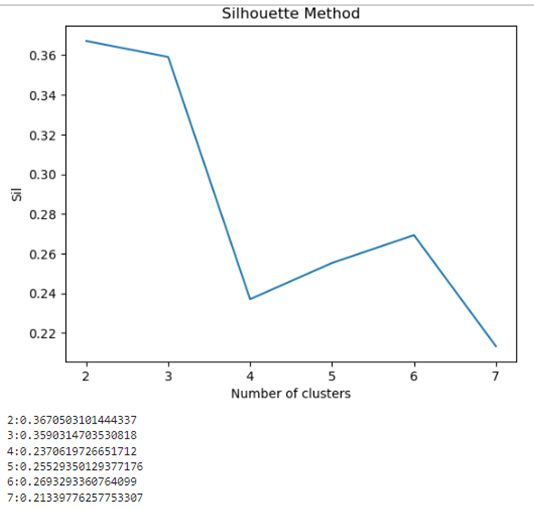

Все значения меньше 0.5, это показатель нечеткой структуры для кластеризации. Поэтому будет неправильно опираться сугубо на результаты силуэтов. По результатам метода силуэтов можно сделать вывод о том, что лучше всего разбивать выборку на 2 или 3 кластера, так как соответствующие им значения являються самыми высокими. Но учитывая ещё и результаты локтя, я приняла решение выделить 2, 3 и 4 кластера.

In [6]:
#km2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
#kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
#pd.DataFrame(kms.cluster_centers_, columns = ['visit_score','product_search_score','ctr_score','stay_score','frequency_score','product_variation_score','order_score','customer_active_segment','X1'])

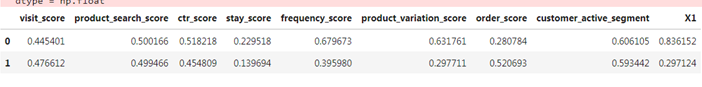

In [7]:
#km3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
#kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
#pd.DataFrame(kms.cluster_centers_, columns = ['visit_score','product_search_score','ctr_score','stay_score','frequency_score','product_variation_score','order_score','customer_active_segment','X1'])

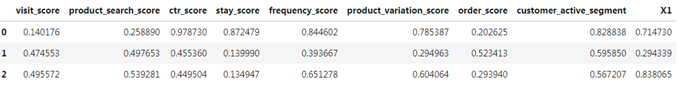

In [8]:
#km4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
#kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
#pd.DataFrame(kms.cluster_centers_, columns = ['visit_score','product_search_score','ctr_score','stay_score','frequency_score','product_variation_score','order_score','customer_active_segment','X1'])

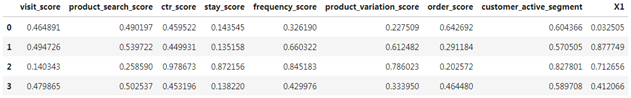

Во всех трёх случаях наблюдаем некоторые практически невариативные переменные, поэтому стоит провести дополнительную кластеризацию на значимых и на вариативных переменных. Для выделения значимых переменных обратимся к методу классификаци, в котором нам уже приходилось отбирать эти параметры, их было 7. Набор вариативных переменных немного отличается от значимых, но стоит отметить, что большинство из них являются значимыми. Таким образом вариативными будут переменные product_search_score, frequency_score, product_variation_score, order_score, customer_active_segment, X1. Сейчас проведем кластеризацию на значимых переменных.

In [9]:
#X = df[:, [0,3,4,5,6,7,8]]

In [10]:
#kmsign2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
#kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
#pd.DataFrame(kms.cluster_centers_, columns = ['visit_score','stay_score','frequency_score','product_variation_score','order_score','customer_active_segment','X1'])

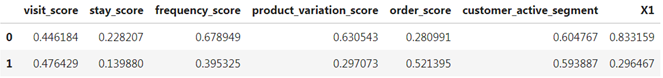

In [11]:
#kmsign3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
#kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
#pd.DataFrame(kms.cluster_centers_, columns = ['visit_score','stay_score','frequency_score','product_variation_score','order_score','customer_active_segment','X1'])

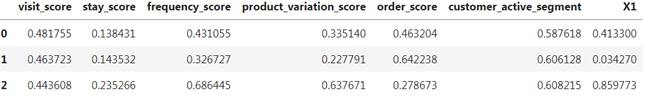

In [12]:
#kmsign4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
#kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
#pd.DataFrame(kms.cluster_centers_, columns = ['visit_score','stay_score','frequency_score','product_variation_score','order_score','customer_active_segment','X1'])

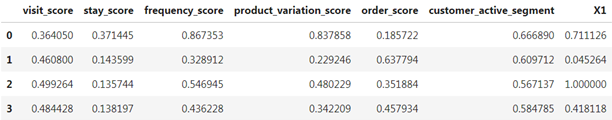

Среди значимых переменных невариативными можно назвать переменные visit_score и stay_score. Они не позволяют нам в полной мере охарактеризовать кластера. Поэтому теперь построим кластера на основе вариативных переменных. 

In [13]:
#X = df[:, [1,4,5,6,7,8]]

In [14]:
#kmvar2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
#kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
#pd.DataFrame(kms.cluster_centers_, columns = ['product_search_score','frequency_score','product_variation_score','order_score','customer_active_segment','X1'])

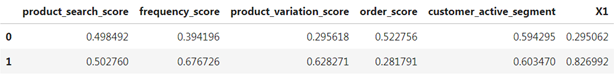

In [15]:
#kmvar3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
#kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
#pd.DataFrame(kms.cluster_centers_, columns = ['product_search_score','frequency_score','product_variation_score','order_score','customer_active_segment','X1'])

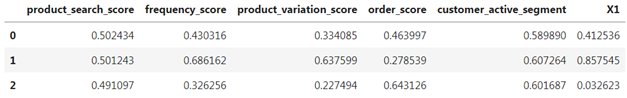

In [16]:
#kmvar4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
#kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
#pd.DataFrame(kms.cluster_centers_, columns = ['product_search_score','frequency_score','product_variation_score','order_score','customer_active_segment','X1'])

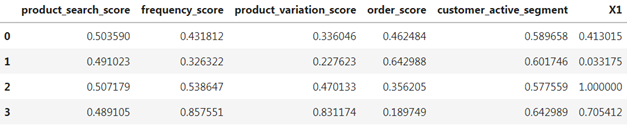

Итак, самые лучшие результаты кластретизации были получены с использованием вариативных параметров, большинство из которых являются также значимыми. Поетому для построения карт Кохонена будем использовать именно этот набор параметров. Но стоит отметить, что в числе вариативных параметров product_search_score стал хуже делиться на кластера. 

Если рассматривать 4-е кластера, то наблюдаем следующую картину:

клиенты, относящиеся к первому кластеру ищут более дорогую и качественную продукцию, имеют чуть ниже средней частоты посещения сайта за день, также они смотрят небольшую разновидность товаров, их успешные покупки находятся на среднем уровне, активность таких клиентов отмечается, как не самая низкая, а лояльность таких клиентов средняя;

второй класс клиентов ищет менее дорогую продукцию, их частота посещений самя низкая, и самый маленький ассортимент товаров, которые они рассматривают, но приетом эта категория клиентов имеет самый высокий успех в удачных покупках, активность выше средней, но самый низкий уровень лояльности. То есть эти клиенты четко знают,чего хотят, и поетому успешно преобретают эту продукию, они являются более требовательными к товару;

третяя группа покупателей ищет немного выше по уровню качества продукцию, с достаточной высокой частотой посещений сайта, со средним числом разновидностей товаров, у таких покупатетлей низкий успех в заказах, которые не возвращены обратно, их активность сама низкая среди всех классов, но при этом самый высокий уровень лояльности;

последняя группа ищет самую дешевую и менее качественную продукцию, но делает это, заходя на сайт чаще всех остальных, у этой категории самый большой асортимент товаров, которые они рассмаривают и самая низкая успешность в покупках, при этом активность этих пкупатетлей самая высокая и почти наивысший уровень лояльности. 

Можно наблюдать такую закономерность, что при более высокой лояльности клиента, ему соответствует более высокая частота посещения сайта, более широкий ассортимент рассматриваемой продукции и менее успешные заказы, то есть много возвратов. Можно предположить, что это связано с тем, что у них нет конкретной цели, больше сомнений в покупке, поэтому они часто посещат сай, что бы ещё раз что-то уточнить, посмотреть, и таким образом в итоге не всегда остаются довольными своими приобретениями.

In [17]:
#import pickle
#obj = {'km2': km2,'km3': km3,'km4': km4,'kmsign2': kmsign2,'kmsign3': kmsign3,'kmsign4': kmsign4,'kmvar2': kmvar2,'kmvar3': kmvar3,'kmvar4': kmvar4}
#output = open('clust-km.pkl', 'wb')
#pickle.dump(obj, output, 2)
#output.close()